In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math, os

%matplotlib inline

Using TensorFlow backend.


In [2]:
image_path = "../input/challenge2018_test/"

batch_size = 100
img_generator = ImageDataGenerator().flow_from_directory(image_path, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

Found 99999 images belonging to 1 classes.


In [3]:
from imageai.Detection import ObjectDetection
model_weight_path = "../input/model/resnet50_coco_best_v2.0.1.h5"

execution_path = os.getcwd()
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(model_weight_path)
detector.loadModel()

In [82]:
class_label_path = "../input/class_label/class-descriptions-boxable.csv"
df = pd.read_csv(class_label_path)
#df.set_index(['Tortoise'])
df.head()
#df.loc[df['Tortoise']=="Container",'/m/011k07'].item()
class_name = df['Tortoise'].values
for i in range(len(class_name)):
    class_name[i] = class_name[i].lower()
#print(class_name)
#if "Container" in class_name:
#    print("OK")

person
OK
person
OK
person
OK
truck
OK


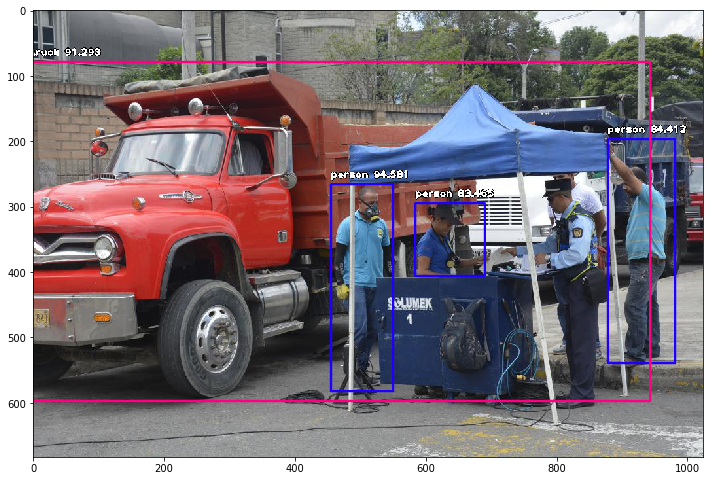

Labels Detected: 
person, 0.8 | person, 0.8 | person, 0.9 | truck, 0.9 | 

Prediction String: 
/m/01g317 0.8346450924873352 0.1 0.1 0.9 0.9 /m/01g317 0.8441165089607239 0.1 0.1 0.9 0.9 /m/01g317 0.9458128213882446 0.1 0.1 0.9 0.9 /m/07r04 0.9129341840744019 0.1 0.1 0.9 0.9 
person
OK
person
OK


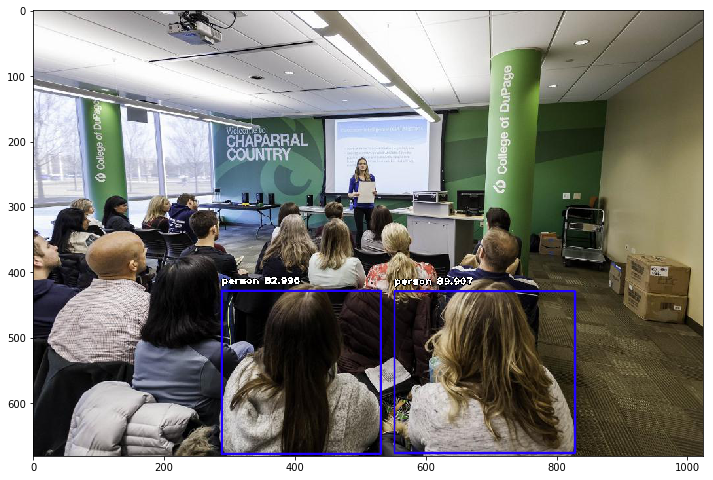

Labels Detected: 
person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01g317 0.829958975315094 0.1 0.1 0.9 0.9 /m/01g317 0.8990694880485535 0.1 0.1 0.9 0.9 
person
OK
person
OK


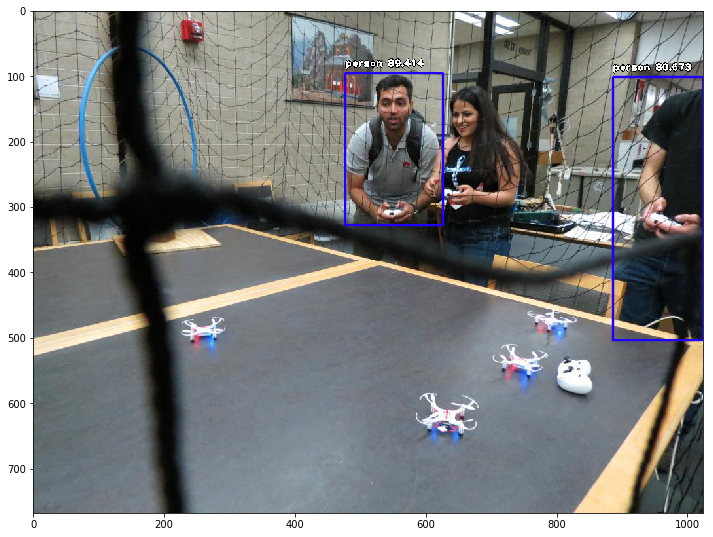

Labels Detected: 
person, 0.9 | person, 0.8 | 

Prediction String: 
/m/01g317 0.8941409587860107 0.1 0.1 0.9 0.9 /m/01g317 0.8067302107810974 0.1 0.1 0.9 0.9 
boat
OK


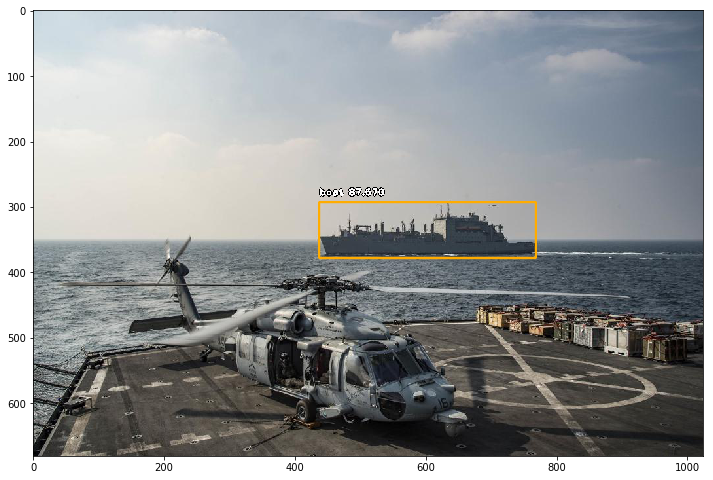

Labels Detected: 
boat, 0.9 | 

Prediction String: 
/m/019jd 0.8766989707946777 0.1 0.1 0.9 0.9 
person
OK
person
OK
person
OK


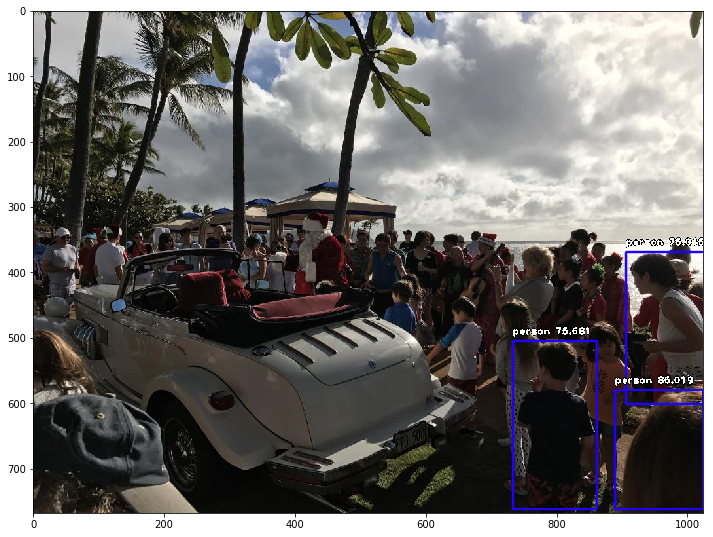

Labels Detected: 
person, 0.8 | person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01g317 0.7504541277885437 0.1 0.1 0.9 0.9 /m/01g317 0.7568120956420898 0.1 0.1 0.9 0.9 /m/01g317 0.8601905107498169 0.1 0.1 0.9 0.9 
vase
OK


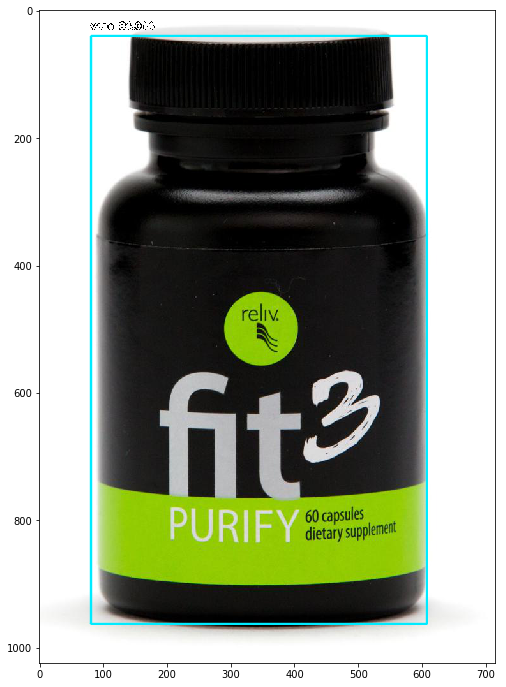

Labels Detected: 
vase, 0.8 | 

Prediction String: 
/m/02s195 0.8401350378990173 0.1 0.1 0.9 0.9 
person
OK
bicycle
OK


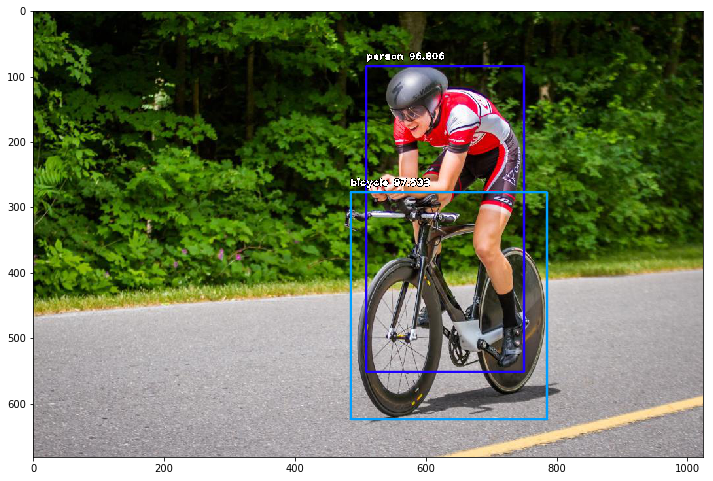

Labels Detected: 
person, 1.0 | bicycle, 1.0 | 

Prediction String: 
/m/01g317 0.9680648446083069 0.1 0.1 0.9 0.9 /m/0199g 0.9753348231315613 0.1 0.1 0.9 0.9 
clock
OK
person
OK
tv


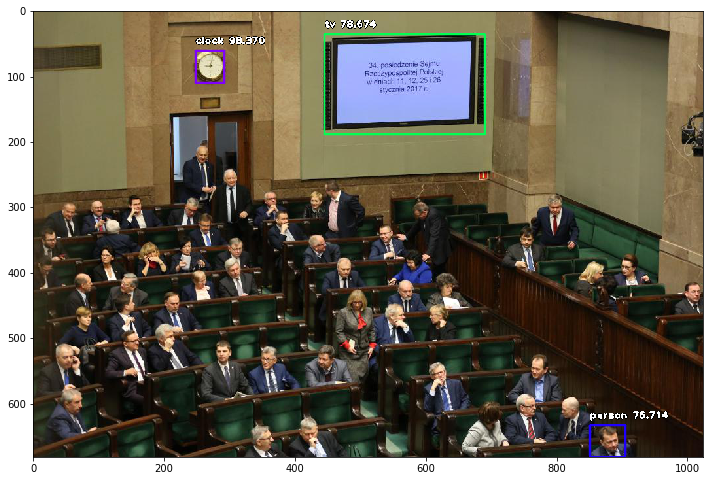

Labels Detected: 
clock, 1.0 | person, 0.8 | 

Prediction String: 
/m/01x3z 0.9837024211883545 0.1 0.1 0.9 0.9 /m/01g317 0.7571411728858948 0.1 0.1 0.9 0.9 
person
OK


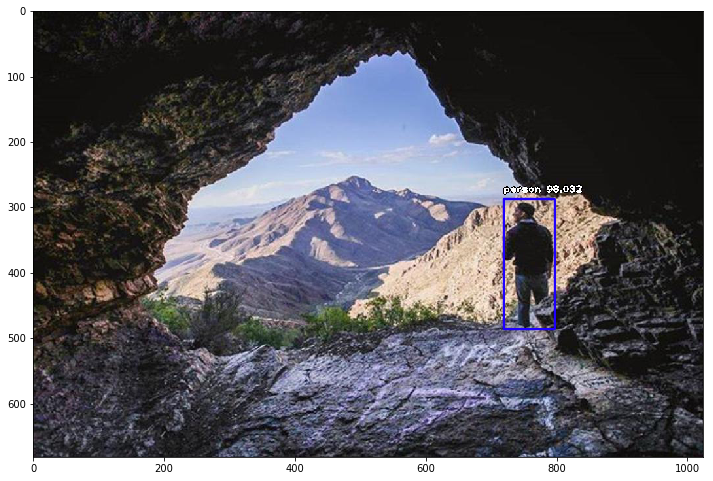

Labels Detected: 
person, 1.0 | 

Prediction String: 
/m/01g317 0.9803229570388794 0.1 0.1 0.9 0.9 
tie
OK
person
OK
person
OK


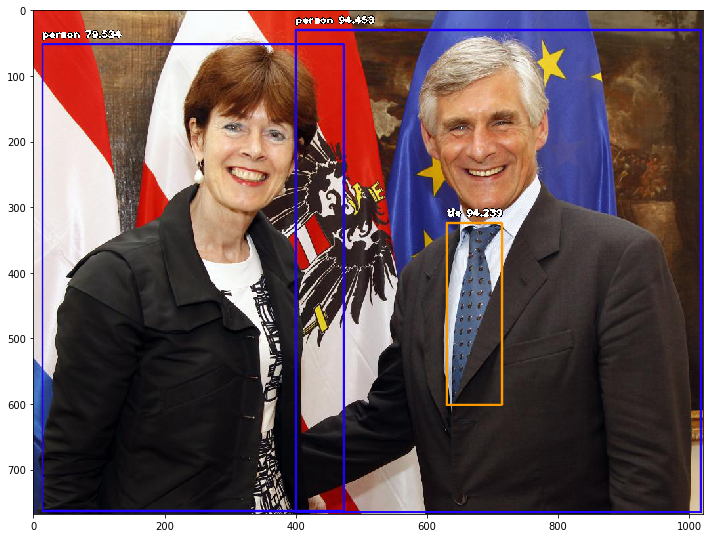

Labels Detected: 
tie, 0.9 | person, 0.8 | person, 0.9 | 

Prediction String: 
/m/01rkbr 0.9423949718475342 0.1 0.1 0.9 0.9 /m/01g317 0.7953414916992188 0.1 0.1 0.9 0.9 /m/01g317 0.9445317983627319 0.1 0.1 0.9 0.9 
cup
person
OK


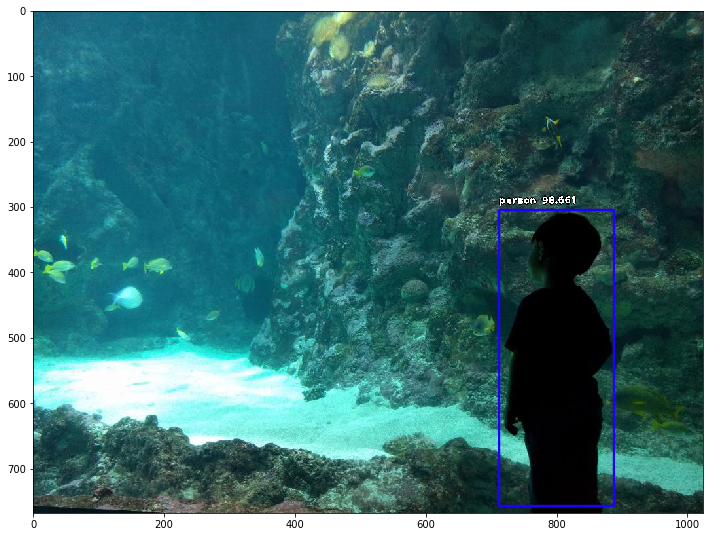

Labels Detected: 
person, 1.0 | 

Prediction String: 
/m/01g317 0.9866095185279846 0.1 0.1 0.9 0.9 
person
OK
person
OK
person
OK


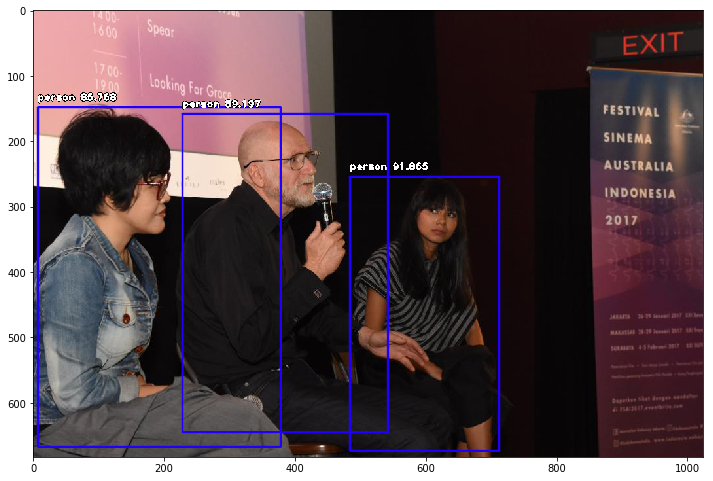

Labels Detected: 
person, 0.9 | person, 0.9 | person, 0.9 | 

Prediction String: 
/m/01g317 0.9186477661132812 0.1 0.1 0.9 0.9 /m/01g317 0.8576839566230774 0.1 0.1 0.9 0.9 /m/01g317 0.8919656872749329 0.1 0.1 0.9 0.9 
airplane
OK
airplane
OK


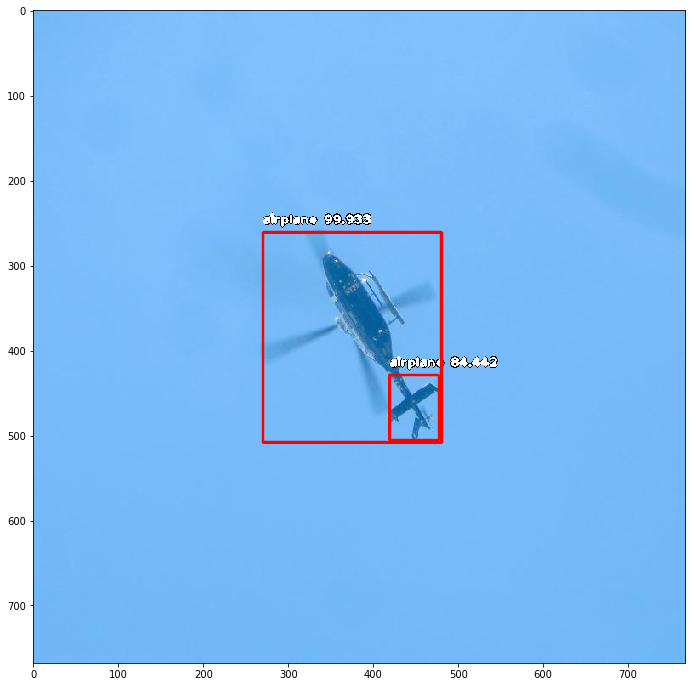

Labels Detected: 
airplane, 0.8 | airplane, 1.0 | 

Prediction String: 
/m/0cmf2 0.8444241881370544 0.1 0.1 0.9 0.9 /m/0cmf2 0.9993276596069336 0.1 0.1 0.9 0.9 


In [81]:
for i in range(n_rounds):
    batch = next(img_generator)
    for j, prediction in enumerate(batch):
        image = filenames[i * batch_size + j]
        detections = detector.detectObjectsFromImage(input_image=image_path+image, output_image_path="image_with_box.png", minimum_percentage_probability = 75)        
        pred_str = ""
        labels = ""
        for eachObject in detections:  
            print(eachObject["name"])
            if eachObject["name"] in class_name:
                print("OK")
#               pred_str += rev[eachObject["name"]] + " " + str(float(eachObject["percentage_probability"])/100) + " 0.1 0.1 0.9 0.9"
                pred_str += df.loc[df['Tortoise'] == eachObject["name"], '/m/011k07'].item() + " " + str(float(eachObject["percentage_probability"])/100) + " 0.1 0.1 0.9 0.9"
                pred_str += " "
                labels += eachObject['name'] + ", " + str(round(float(eachObject['percentage_probability'])/100, 1)) 
                labels += " | "
        if labels != "":
            plt.figure(figsize=(12,12))
            plt.imshow(plt.imread("image_with_box.png"))
            plt.show()

            print ("Labels Detected: ")
            print (labels)
            print ()
            print ("Prediction String: ")
            print (pred_str)


    if i == 10:
        break


In [76]:
l1 = "A"
l2 = l1.lower()
print(l2)

a
